Analisis de revisión sistematica de modelos computacionales que predicen estados afectivos utilizando actividad electrodermica.                                                                                                            
Pre- registro: https://osf.io/ewuaf/  
Cantidad de papers N = 101

In [1]:
from operator import getitem
from pyexpat import model
from traceback import print_tb
import pandas as pd
import openpyxl
from sympy import convolution
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke
#from sympy import pretty_print
import stylecloud
import stop_words
from stop_words import get_stop_words
import pycountry
import plotly.express as px
import networkx as nx



Inicio definición de las variables

In [9]:
archivo = "C:/Users/martu/OneDrive/Escritorio/Review_EDA_Emotion_Recognition/Lorenzo/Propuesta formato tabla.xlsx"
tabla=pd.read_excel("C:/Users/martu/OneDrive/Escritorio/Review_EDA_Emotion_Recognition/Lorenzo/Propuesta formato tabla.xlsx")
df= pd.DataFrame(tabla)
df_sin_duplicado = df.drop_duplicates(subset="paper_id")
df.head()
df.columns

#Tomo la columna Affective model de la hoja Statistical Learning model
modelos = pd.read_excel(archivo, sheet_name="Statistical Learning model", usecols=["Affective model"])
año = pd.read_excel(archivo, sheet_name="Metadata", usecols=['year'])
paper_id = pd.read_excel(archivo, sheet_name="Metadata", usecols=['paper_id'])

#Evolución del modelo
modelo_evolve= pd.read_excel("C:/Users/martu/OneDrive/Escritorio/Review_EDA_Emotion_Recognition/Lorenzo/Evolución del modelo.xlsx")
modelo_evolve.columns

modelo = modelo_evolve.drop_duplicates(subset='paper_id')

#Cantidad de modelos en total a través del tiempo
tipo_modelo = modelo['Affective model'] #dimensional = 318 , categorial= 183, sin eliminación duplicado
#Con eliminación de duplicados : dimensional = 64 categorial = 37

#Tomo archivo para luego graficar la evolución del modelo
grafico = pd.read_excel("C:/Users/martu/OneDrive/Escritorio/Review_EDA_Emotion_Recognition/Lorenzo/frecuencia_modelo.xlsx")
grafico_modelo = pd.DataFrame(grafico)

# BASE DE DATOS
data_type = pd.read_excel(archivo, sheet_name="Data type")
data_type= data_type.drop_duplicates(subset='paper_id')
colum_data = data_type.columns

#AUTOREPORTE
self_report = pd.read_excel(archivo, sheet_name="Selft report")
self_report.columns
self_report = self_report.drop_duplicates(subset='paper_id')

#Tecnicas de elicitación
emotion_elicitation = pd.read_excel(archivo, sheet_name="Emotion elicitation techniques")
emotion_elicitation.columns
emotion_elicitation = emotion_elicitation.drop_duplicates(subset='paper_id')

# Duración de los estimulos
duration= emotion_elicitation ['elicitation_duration'] 
duration_range = emotion_elicitation ['elicitation_duration_range']
duration_mean = emotion_elicitation ['elicitation_duration_mean']
duration_median= emotion_elicitation ['elicitation_duration_median']# no tiene nada

#Tipo de algoritmo
algoritmo = pd.read_excel(archivo, sheet_name="Statistical Learning model")
#creo archivo con los nombres
#al= pd.ExcelWriter("algoritmo.xlsx")
#a.to_excel(al, "modelo")
#al.save()
#al.close()

#Sección de interpretación 
model_interpretation = pd.read_excel(archivo, sheet_name="Statistical Learning model")
interpretation=model_interpretation[model_interpretation['model_interpretation']== "-"].index
model_interpretation= model_interpretation.drop(interpretation)

#Distribución por paises de mundo
world = pd.read_excel("C:/Users/martu/OneDrive/Escritorio/Review_EDA_Emotion_Recognition/Lorenzo/mapa.xlsx")
world= pd.DataFrame(world)

Limpieza y exploración de datos 

In [ ]:
#MODELOS AFECTIVOS

#filtramos cantidad de modelos solo en 2010
selec1=modelo[modelo["year"]== 2010]
cant1= selec1.groupby("Affective model").size()
#filtramos cantidad de modelos solo en 2011
selec2=modelo[modelo["year"]== 2011]
cant2= selec2.groupby("Affective model").size()
#filtramos cantidad de modelos solo en 2012
selec3=modelo[modelo["year"]== 2012]
cant3= selec3.groupby("Affective model").size()
#filtramos cantidad de modelos solo en 2013
selec4=modelo[modelo["year"]== 2013]
cant4= selec4.groupby("Affective model").size()
#filtramos cantidad de modelos solo en 2014
selec5=modelo[modelo["year"]== 2014]
cant5= selec5.groupby("Affective model").size()
#filtramos cantidad de modelos solo en 2015
selec6=modelo[modelo["year"]== 2015]
cant6= selec6.groupby("Affective model").size()
#filtramos cantidad de modelos solo en 2016
selec7=modelo[modelo["year"]== 2016]
cant7= selec7.groupby("Affective model").size()
#filtramos cantidad de modelos solo en 2017
selec8=modelo[modelo["year"]== 2017]
cant8= selec8.groupby("Affective model").size()
print("cantidad de modelos solo en 2017"":", cant8)
#filtramos cantidad de modelos solo en 2018
selec9=modelo[modelo["year"]== 2018]
cant9= selec9.groupby("Affective model").size()
#filtramos cantidad de modelos solo en 2019
selec10=modelo[modelo["year"]== 2019]
cant10= selec10.groupby("Affective model").size()
#filtramos cantidad de modelos solo en 2020
selec11=modelo[modelo["year"]== 2020]
cant11= selec11.groupby("Affective model").size()

#BASE DE DATOS 

# DEAP
data_type['DEAP ']= data_type['DEAP ']. replace("x", "DEAP") 
data_type['DEAP ']= data_type['DEAP ']. replace("X", "DEAP") 
deap= data_type.groupby('DEAP ').size()
print(deap)

#AMIGOS
data_type['AMIGOS']= data_type['AMIGOS']. replace("x", 'AMIGOS') 
data_type['AMIGOS']= data_type['AMIGOS']. replace("X", "AMIGOS") 
amigos= data_type.groupby('AMIGOS').size()
print(amigos)

#MAHNOB
data_type['MAHNOB']= data_type['MAHNOB']. replace("x", 'MAHNOB') 
data_type['MAHNOB']= data_type['MAHNOB']. replace("X", 'MAHNOB')
mahnob= data_type.groupby('MAHNOB').size()
print(mahnob)

#CASE
data_type['CASE']= data_type['CASE']. replace("x", 'CASE') 
data_type['CASE']= data_type['CASE']. replace("X", 'CASE')
case= data_type.groupby('CASE').size()
print(case)

#Ascertain
data_type['Ascertain']= data_type['Ascertain']. replace("x", 'Ascertain') 
data_type['Ascertain']= data_type['Ascertain']. replace("X", 'Ascertain')
asc= data_type.groupby('Ascertain').size()
print(asc)

#Cog.load
data_type['Cog.load']= data_type['Cog.load']. replace("x", 'Cog.load')
data_type['Cog.load']= data_type['Cog.load']. replace("X", 'Cog.load')
cog= data_type.groupby('Cog.load').size()

#Multimodal Dyadic Behavior (MMDB)
data_type['Multimodal Dyadic Behavior (MMDB)']= data_type['Multimodal Dyadic Behavior (MMDB)']. replace("x", 'MMDB')
data_type['Multimodal Dyadic Behavior (MMDB)']= data_type['Multimodal Dyadic Behavior (MMDB)']. replace("X", 'MMDB')
mmdb= data_type.groupby('Multimodal Dyadic Behavior (MMDB)').size()

#RECOLA
data_type['RECOLA']= data_type['RECOLA']. replace("x", 'RECOLA')
data_type['RECOLA']= data_type['RECOLA']. replace("X", 'RECOLA')
recola= data_type.groupby('RECOLA').size()

#DECAF
data_type['DECAF']= data_type['DECAF']. replace("x", 'DECAF')
data_type['DECAF']= data_type['DECAF']. replace("X", 'DECAF')
decaf = data_type.groupby('DECAF').size()

#Driving Workload
data_type['Driving Workload']= data_type['Driving Workload']. replace("x", 'Driving Workload')
data_type['Driving Workload']= data_type['Driving Workload']. replace("X", 'Driving Workload')
driving = data_type.groupby('Driving Workload').size()

#(AV+EC) 2015
data_type['(AV+EC) 2015']= data_type['(AV+EC) 2015']. replace("x", 'AV+EC')
data_type['(AV+EC) 2015']= data_type['(AV+EC) 2015']. replace("X", 'AV+EC')
av = data_type.groupby('(AV+EC) 2015').size()

#Liris
data_type['Liris']= data_type['Liris']. replace("x", 'Liris')
data_type['Liris']= data_type['Liris']. replace("X", 'Liris')
liris= data_type.groupby('Liris').size()

#SenseEmotion
sense= data_type.groupby('SenseEmotion').size()

#"PMEmo"
pmemo= data_type.groupby("PMEmo").size()

#'AFEW'
afew= data_type.groupby('AFEW').size()

#'Hazumi1911'
hazumi= data_type.groupby('Hazumi1911').size()

#'Bio Vid Emo\nDB'
bio = data_type.groupby('Bio Vid Emo\nDB').size()

#'RCDAT' 
rcdat= data_type.groupby('RCDAT').size()

#'DREAMER',
dreamer= data_type.groupby("DREAMER").size()

#'Non-EEG Biosignals Data Set for\nAssessment and Visualization of Neurological Status'
eeg= data_type.groupby('Non-EEG Biosignals Data Set for\nAssessment and Visualization of Neurological Status').size()

#'Stress Recognition in Automobile\nDrivers Data Set', 
str= data_type.groupby('Stress Recognition in Automobile\nDrivers Data Set').size()

#'PsPM-HRA1'
pspm= data_type.groupby('PsPM-HRA1').size()

#LOS PAPER ID CON EXCEPCIÓN A LA REGLA DE ELIMINACIÓN DE DUPLICADOS SON: 38 (se agrega 1 a DEAP, AMIGOS, MAHNOB, COG.LOAD, DRIVING WORKLOAD) 
# Y 62 ( SE AGREGA UNO DE DEAP Y MAHNOB)
#PAPER ID 59 (DE LOLO) Y 94 (DE EMMA) NO TIENEN MARCADA EL TIPO DE BASE DE DATOS; CHEQUEAR
#PAPER ID 95 TIENE BASE DE DATOS Y PRIVADA, OJO AL ELIMINAR DUPLICADOS PARA EL GRAFICO DE BASE DE DATOS PRIVADAS
#PAPER ID 7 NO TIENE NADA MARCADO (ES DE AGUS VER)

#DIMENSIONES DEL AUTOREPORTE

#inicio conteo de casos de los modelos dimensionales
valence= self_report.groupby('dimension_valence').size()
arousal= self_report.groupby('dimension_arousal').size()
dominance= self_report.groupby('dimension_dominance').size()
like = self_report.groupby('dimension_like_or_dislike').size()
familiarity = self_report.groupby('dimension_familiarity').size()
stress = self_report.groupby('dimension_stress').size()
engagement= self_report.groupby('dimension_engagement').size()


#Filtrado para categorias dentro de self-report (FLACO HACETE UNA FUNCIÓN)

anger = self_report.groupby("categorial_anger").size()#1
stress = self_report.groupby("Stress").size()#1
disgust = self_report.groupby("Disgust").size()#2
fear = self_report.groupby("Fear").size()#2
sadness= self_report.groupby("Sadness").size()#2
surprise = self_report.groupby("Surprise").size()#1
hapiness = self_report.groupby("Happiness").size()#1
pleasant= self_report.groupby("Pleasant").size()#1
unpleasant = self_report.groupby("Unpleasant").size()#0
anxiety = self_report.groupby("Anxiety").size()#2
neutral = self_report.groupby("Neutral").size()#3
funny= self_report.groupby("Funny").size()#1
horror= self_report.groupby("Horror").size()#nada
weepy= self_report.groupby("Weepy").size()#nada
boredom= self_report.groupby("Boredom").size()#2
relaxation= self_report.groupby("Relaxation").size()#1
amusement= self_report.groupby("Amusement").size() #nada
confusion= self_report.groupby("Confusion").size()#nada
curiosity= self_report.groupby("Curiosity").size()#nada
delight = self_report.groupby("Delight").size()#nada
flow= self_report.groupby("flow/engagement").size()#nada
frustration= self_report.groupby("Frustration").size()#nada
tenderness= self_report.groupby("Tenderness").size()#nada
joy= self_report.groupby("Joy").size()#1

#print(anger,stress,disgust,fear,sadness,surprise,hapiness,pleasant,unpleasant,anxiety,neutral)
#print(unpleasant,funny,horror,weepy,boredom,relaxation,amusement,curiosity,delight,flow,frustration,tenderness,joy)

#Tiempo de elicitación 

emotion_elicitation.groupby('elicitation_duration').size()
emotion_elicitation.groupby('elicitation_duration_range').size()
emotion_elicitation.groupby('elicitation_duration_mean').size()


#Excluyo columnas, podría haber condensado todo en una linea de codigo ?, no es necesario igual esta exclusión
algoritmo= algoritmo.loc[:,algoritmo.columns != "Affective model"]
algoritmo= algoritmo.loc[:,algoritmo.columns != "apa_citation"]
algoritmo= algoritmo.loc[:,algoritmo.columns != "model_id"]
algoritmo= algoritmo.loc[:,algoritmo.columns != "paper_id"]
algoritmo= algoritmo.loc[:,algoritmo.columns != 'class_model_output_number']
algoritmo= algoritmo.loc[:,algoritmo.columns != 'class_model_output_categories']
algoritmo= algoritmo.loc[:,algoritmo.columns != 'public_code_location']
algoritmo= algoritmo.loc[:,algoritmo.columns != 'is_public_code']
algoritmo= algoritmo.loc[:,algoritmo.columns != 'model_interpretation']
algoritmo= algoritmo.loc[:,algoritmo.columns != 'is_physiologicall_interpretation']
algoritmo= algoritmo.loc[:,algoritmo.columns != 'n_model_input']
a = algoritmo.columns; a = pd.DataFrame(a)

#PIBE CREATE UNA FUNCIÓNNNN
pnn = algoritmo.groupby('PNN probabilistic neural network').size(); lstm = algoritmo.groupby('LSTM.1').size()
print(pnn,lstm)# NO HAY NADA
recurrent= algoritmo.groupby('Recurrent NN.1').size(); convulution= algoritmo.groupby('Convolutional NN.1').size()
print(recurrent,convulution)# 4 y 4
full= algoritmo.groupby('Fully connected NN (or Multi layer perceptron).1').size(); regre=algoritmo.groupby('regre_Boosted regression trees').size()
print(full,regre) # 3 y 2
multi = algoritmo.groupby('regre_Multilayer regression').size(); dec=algoritmo.groupby('regre_decision tree').size()
print(multi,dec)#2 y 6
knn=algoritmo.groupby('regre_knn').size(); rr=algoritmo.groupby('regre_Random Regression').size()
print(knn,rr)# 4 y 15
lr= algoritmo.groupby('regre_Logistic regression').size(); rrr=algoritmo.groupby('regre_Ridge regression').size()
print(lr,rrr)#2 y 2
rpl=algoritmo.groupby('regre_Polynomial Regression').size(); rsvm=algoritmo.groupby('regre_Support Vector Regression (SVR)').size()
print(rpl,rsvm)# 1 y 4
regre_inr=algoritmo.groupby('regre_inear Regression').size(); jrip=algoritmo.groupby('class_JRip').size()
print(regre_inr,jrip)# 6 y 3
# dejo afuera: 'regre_model_output_number', 'regre_model_output_dimensions'
rule= algoritmo.groupby('class_1R rule').size(); rbf= algoritmo.groupby('class_radial basis function\n(RBF) ').size()
print(rule,rbf)# 1 y 2
sdbn= algoritmo.groupby('Spiking Deep Belief Network (SDBN)').size() ; pnn2 = algoritmo.groupby('Probabilistic Neural Network (PNN)').size()
print(sdbn,pnn2)# 2 y 12
qnn= algoritmo.groupby('Quantum Neural Network (QNN)').size() ; dt= algoritmo.groupby('AdaBoost DT').size()
print(qnn,dt) # 2 y 11
cnn= algoritmo.groupby('Cellular Neural Networks').size() ; lstm2= algoritmo.groupby('LSTM').size()
print(cnn,lstm2) # 1 y 6 
gru = algoritmo.groupby('GRU (Gated Recurrent Units)').size(); rnn2 = algoritmo.groupby('Recurrent NN').size()
print(gru,rnn2)# 2 y 0
cnn2= algoritmo.groupby('Convolutional NN').size(); fullnn=algoritmo.groupby('Fully connected NN (or Multi layer perceptron)').size()
print(cnn2,fullnn)#28 y 20
#dejo afuera 'Fully connected Layer?'
grboost= algoritmo.groupby('Gradient boostingclass_').size(); hmm= algoritmo.groupby('class_HMM').size()
print(grboost,hmm)# 21 y 3
hdc= algoritmo.groupby('class_HDC-MER').size(); tpa= algoritmo.groupby('class_TPA').size()
print(hdc,tpa) # 2 y 0
var= algoritmo.groupby('class_Ridge-VAR').size(); lasso_var= algoritmo.groupby('class_LASSO-VAR').size()
print(var,lasso_var)#0 y 0
ridget=algoritmo.groupby('class_Ridge-T').size(); class_lasso=algoritmo.groupby('class_LASSO-T').size()
print(ridget,class_lasso)# 0 y 0
avg = algoritmo.groupby('class_AVG').size(); bayes= algoritmo.groupby('class_Naive Bayes').size()
print(avg,bayes)#0 y 31
tree= algoritmo.groupby('class_Tree based models').size(); lda2= algoritmo.groupby('class_Linear Discriminant Analysis (LDA)').size()
print(tree,lda2)#57 y 18
qda2= algoritmo.groupby('class_Quadratic discrimant clasifier (QDA)').size(); knn2= algoritmo.groupby('class_k-Nearest Neighbor (k-NN)').size()
print(qda2,knn2)#11 y 77
svm2= algoritmo.groupby('class_Support Vector Machine (SVM)').size(); lr2=algoritmo.groupby('class_Logistic Regression').size()
print(svm2,lr2)#132 y 10

bp = algoritmo.groupby("Backpropagation (BP)").size()
elm= algoritmo.groupby("Extreme Learning Machine (ELM)").size()
ann = algoritmo.groupby("ANN").size()
print(bp,elm,ann)

algoritmo = pd.read_excel("C:/Users/martu/OneDrive/Escritorio/Review_EDA_Emotion_Recognition/Lorenzo/algoritmo.xlsx")
algoritmo= algoritmo.sort_values("fr",ascending=False)

#creo archivo con los nombres
#al= pd.ExcelWriter("algoritmo.xlsx")
#a.to_excel(al, "modelo")
#al.save()
#al.close()

#Interpretación del modelo
model_interpretation=model_interpretation.drop_duplicates(subset='paper_id')
model_interpretation = model_interpretation[model_interpretation['model_interpretation'].notna()]
model_interpretation= model_interpretation['model_interpretation']
#model_interpretation.astype(str)# me aseguro que me lo tome todo como string
model_interpretation= model_interpretation.to_numpy().transpose().tolist() # aca transformo todo a una lista de listas

#creo un documento word
#document = Document()
#document.add_heading('Documento creado con Python', 0)
#p = document.add_paragraph(model_interpretation)
#document.save('Model interpretation.docx')

#Mapa mundo

mapa=df_sin_duplicado[df_sin_duplicado["year"]==2010]
uno=mapa.groupby('first_author_country_affiliation').size()

mapa=df_sin_duplicado[df_sin_duplicado["year"]==2011]
dos= mapa.groupby('first_author_country_affiliation').size()
print(tres)

mapa=df_sin_duplicado[df_sin_duplicado["year"]==2012]
tres= mapa.groupby('first_author_country_affiliation').size()

mapa=df_sin_duplicado[df_sin_duplicado["year"]==2013]
tres= mapa.groupby('first_author_country_affiliation').size()

mapa=df_sin_duplicado[df_sin_duplicado["year"]==2014]
tres= mapa.groupby('first_author_country_affiliation').size()

mapa=df_sin_duplicado[df_sin_duplicado["year"]==2015]
tres= mapa.groupby('first_author_country_affiliation').size()

mapa=df_sin_duplicado[df_sin_duplicado["year"]==2016]
tres= mapa.groupby('first_author_country_affiliation').size()

mapa=df_sin_duplicado[df_sin_duplicado["year"]==2017]
tres= mapa.groupby('first_author_country_affiliation').size()
print(tres)

mapa=df_sin_duplicado[df_sin_duplicado["year"]==2018]
tres= mapa.groupby('first_author_country_affiliation').size()

mapa=df_sin_duplicado[df_sin_duplicado["year"]==2019]
tres= mapa.groupby('first_author_country_affiliation').size()


mapa=df_sin_duplicado[df_sin_duplicado["year"]==2020]
tres= mapa.groupby('first_author_country_affiliation').size()

h =list (pycountry.countries)

pycountry.countries.get(name="Italy") # ITA
pycountry.countries.get(name="lithuania")#LTU


Inicio Graficos

In [ ]:
#Evolución del modelo

g = sns.FacetGrid(grafico_modelo, col='Modelos', hue='Modelos', col_wrap=1)

# Add the line over the area with the plot function
g = g.map(plt.plot, 'Año', "Frecuencia")
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'Año', "Frecuencia", alpha=0.2).set_titles("{col_name} Año")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plot
plt.subplots_adjust(top=0.90)

plt.show()



#Tipo de base de datos


counts = [12,9,10,2,1,2,1,2,1,1,3,1,1,1,1,1] #agregada info de casos particulares
names = ["DEAP", "AMIGOS", "MANHOB", "ASCERTAIN", "MMDB", "RECOLA", "DECAF", "DRIVING WORKLOAD", "AV+EC", "LIRIS", "PMEMO", "AFEW", "HAZUMI1911", "BIO VID", "RCDAT", "Cog.load" ]
y = [i * 0.9 for i in range(len(names))]
BLUE = "#076fa2"
RED = "#E3120B"
BLACK = "#202020"
GREY = "#a2a2a2"
fig, ax = plt.subplots(figsize=(12, 7))
ax.barh(y, counts, height=0.55, align="edge", color=BLUE);

#personalizacion

ax.xaxis.set_ticks([i * 5 for i in range(0, 12)])
ax.xaxis.set_ticklabels([i * 5 for i in range(0, 12)], size=16, fontfamily="Econ Sans Cnd", fontweight=100)
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)

ax.set_xlim((0, 55.5))
ax.set_ylim((0, len(names) * 0.9 - 0.2))
ax.set_axisbelow(True)
ax.grid(axis = "x", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")
ax.yaxis.set_visible(False)

#agregado de etiqueta
PAD = 0.3
for name, count, y_pos in zip(names, counts, y):
    x = 0
    color = "white"
    path_effects = None
    if count < 8:
        x = count
        color = BLUE    
        path_effects=[withStroke(linewidth=6, foreground="white")]
    
    ax.text(
        x + PAD, y_pos + 0.5 / 2, name, 
        color=color, fontfamily="Econ Sans Cnd", fontsize=18, va="center",
        path_effects=path_effects
    ) 
fig

#retoque final
fig.subplots_adjust(left=0.005, right=1, top=0.8, bottom=0.1)
fig.text(
    0, 0.925, "Type Database", 
    fontsize=22, fontweight="bold", fontfamily="Econ Sans Cnd"
)

fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))
fig.set_facecolor("white")
fig.show()


Dimensión de los modelos emocionales

In [ ]:
#Dimensiones tomadas en modelos dimensionales

names = ['Valence', 'Arousal', 'Dominance', 'Like or Dislike', "Familiarity"]
size = [21,21,2,2,1]
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


#Grafico de categorias 
# FIJARSE DE HACERLO EN DUPLAS Y VER TEMA DE GRAFICO DE GRAFO
categorial = pd.DataFrame ({ "Name": ["Anger", "Stress","Disgust","Fear","Sadness", "Surprise","Hapiness", "Pleasant","Anxiety", "Neutral", "Funny", "Boredom", "Relaxation", "Joy"], "Value":[1,1,2,2,2,1,1,1,2,3,1,2,1,1]})
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 100
lowerLimit = 30
labelPadding = 4
max = categorial['Value'].max()
slope = (max - lowerLimit) / max
heights = slope * categorial.Value + lowerLimit
width = 2*np.pi / len(categorial.index)

indexes = list(range(1, len(categorial.index)+1))
angles = [element * width for element in indexes]
##
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
    )
for bar, angle, height, label in zip(bars,angles, heights, categorial["Name"]):

    
    rotation = np.rad2deg(angle)

    
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
plt.title("Categorys of affective questionarie")
plt.show()


Algoritmos

In [ ]:
# Algoritmos

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))


sns.set_color_codes("pastel")
sns.barplot(x="fr", y="name", data=algoritmo,
            label="Algoritmos", color="b")



# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Frequency")
sns.despine(left=True, bottom=True)
plt.title("Types algorithm")
plt.show()


WordCloud

In [ ]:
#Grafico frecuencias de palabras
# queda por eliminar words: show, smill, proposed, dataset, difference 
palabras_irrelevantes = get_stop_words ("english")
print(palabras_irrelevantes)
stylecloud.gen_stylecloud(file_path="C:/Users/martu/OneDrive/Escritorio/Review_EDA_Emotion_Recognition/Lorenzo/model_interpretation.txt",
icon_name="fab fa-apple", palette= "cartocolors.qualitative.Pastel_3", background_color="black", output_name="Model interpretation.png", collocations=False, custom_stopwords= palabras_irrelevantes)


Mundo

In [ ]:
#Mundo 

fig = px.choropleth(world,locations='id', color= "fr", scope="world", projection='natural earth',animation_frame= 'year', hover_name = "country", color_continuous_scale = "aggrnyl")
fig.show()

Grafico de Grafo con las categorias y dimensiones del self-report


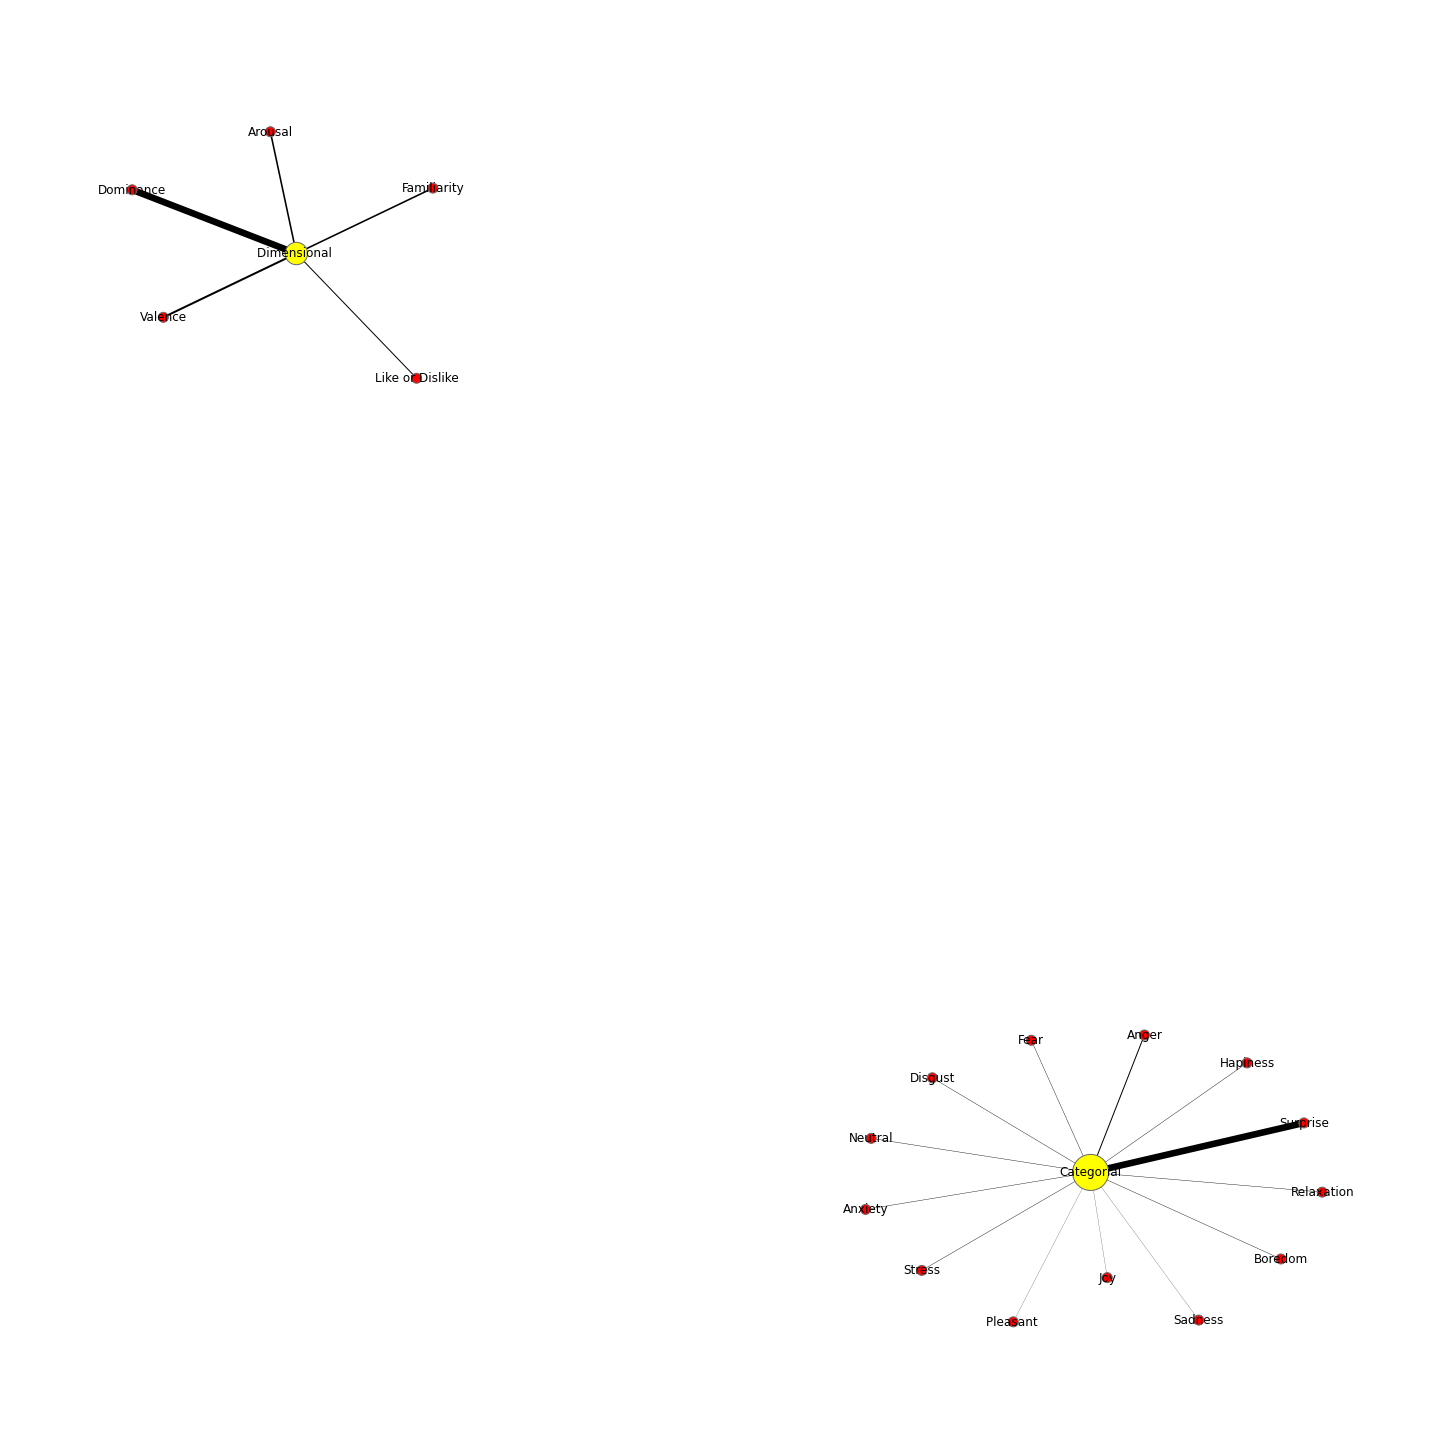

In [2]:
graf= "C:/Users/martu/OneDrive/Escritorio/Review_EDA_Emotion_Recognition/Lorenzo/categories_selfreport.xlsx"

grafo = pd.read_excel(graf, sheet_name="self")
grafo.columns

G = nx.from_pandas_edgelist(grafo,'Name', "Type",edge_attr=True)
edgelist=nx.to_edgelist(G)
colors=[]
for node in G:
    if node in grafo["Type"].values:
        colors.append("yellow")
    else:
        colors.append("red")
#Recordar que la data de Frequency fue alterada, lo de ahora solo tiene valor de prueba, lo mismo aplica hasta donde aclare que no 
plt.figure(figsize=(20,20))
nx.draw(G,with_labels= True,node_color = colors, node_size=[v * 100 for v in dict(G.degree()).values()], width=[v[2]["Frequency"]/5 for v in edgelist])
ax = plt.gca()
ax.collections[0].set_edgecolor("#696969")

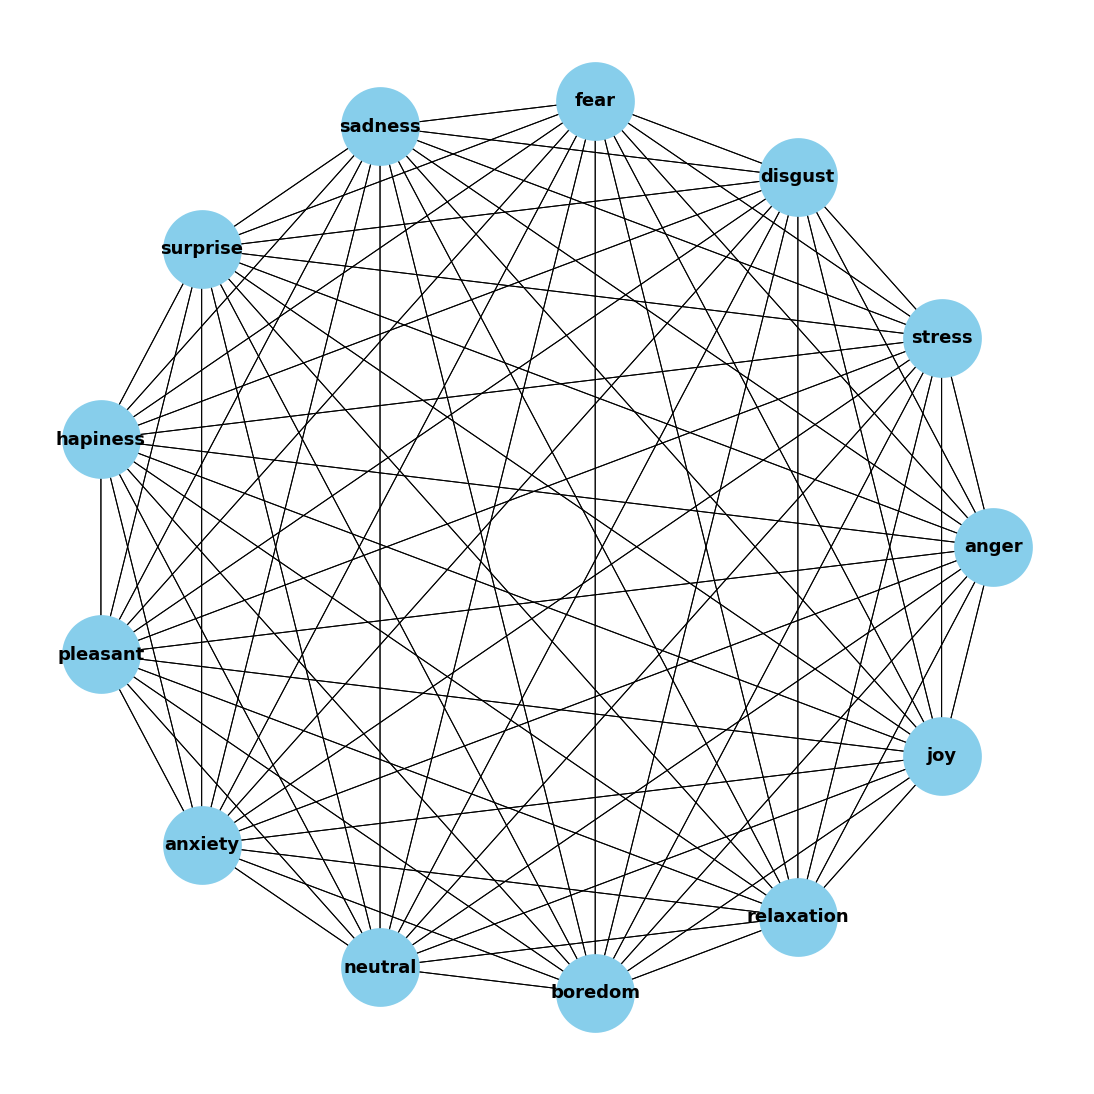

In [5]:
 #Probando
h ="C:/Users/martu/OneDrive/Escritorio/Review_EDA_Emotion_Recognition/Lorenzo/categories_selfreport.xlsx"

grafico= pd.read_excel(h, sheet_name="matriz")
#grafico = grafico.iloc[:,18:]
grafico.columns
grafico= grafico[["anger","stress","disgust","fear","sadness","surprise","hapiness","pleasant","anxiety","neutral","boredom","relaxation","joy"]]
adj_matrix = grafico.T.dot(grafico)
np.fill_diagonal(adj_matrix.values, 0)
G = nx.DiGraph(adj_matrix)
plt.figure(figsize=(15,15))
g = nx.draw_circular(G,with_labels= True, node_size=1500, node_color = "skyblue", linewidths= 40,
font_size=18,font_color="black", font_weight= "bold", width=1)

Valence      1
Dimensional       5
Arousal      1
Dominance      1
Like or Dislike      1
Familiarity      1
Anger      1
Categorial     13
Disgust      1
Surprise      1
Boredom      1
Stress      1
Anxiety      1
Fear      1
Neutral      1
Hapiness      1
Joy       1
Pleasant       1
Relaxation      1
Sadness      1


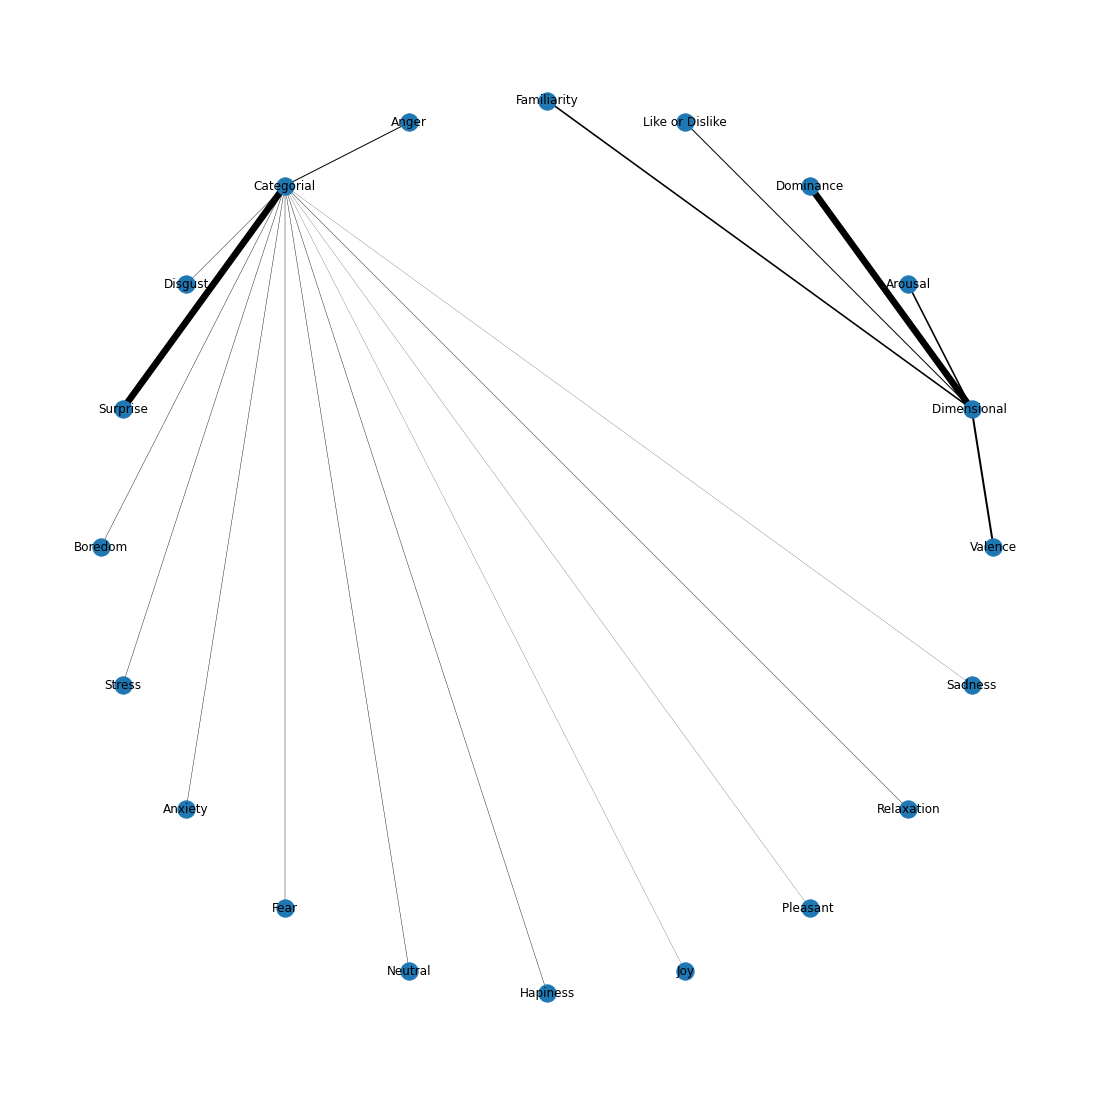

In [6]:
#lo hacemos circular

G = nx.from_pandas_edgelist(grafo,'Name', "Type",edge_attr=True)

for v in G:
    print(f"{v:4} {G.degree(v):6}")
plt.figure(figsize=(15,15))
nx.draw_circular(G, with_labels=True,width=[v[2]["Frequency"]/5 for v in edgelist])
plt.show()

{('categorial_anger',
  'Disgust'): Text(0.8117448908442051, 0.39091576880980833, '2'),
 ('categorial_anger',
  'Fear'): Text(0.6112604817694405, 0.4874639680523823, '2'),
 ('categorial_anger',
  'Sadness'): Text(0.3887395203592968, 0.4874639680523823, '2'),
 ('categorial_anger',
  'Surprise'): Text(0.18825509638337112, 0.39091576880980833, '2'),
 ('categorial_anger',
  'Happiness'): Text(0.04951557070223106, 0.2169419260951829, '2'),
 ('categorial_anger',
  'Neutral'): Text(0.1882551857903379, -0.3909157903806372, '2'),
 ('Disgust',
  'categorial_anger'): Text(0.8117448908442051, 0.39091576880980833, '2'),
 ('Disgust', 'Fear'): Text(0.4230053811285948, 0.8783797178452828, '35'),
 ('Disgust', 'Sadness'): Text(0.2004844197184511, 0.8783797178452828, '35'),
 ('Disgust',
  'Surprise'): Text(-4.257474595092958e-09, 0.7818315186027088, '2'),
 ('Disgust', 'Happiness'): Text(-0.13873952993861466, 0.6078576758880834, '2'),
 ('Disgust', 'Pleasant'): Text(-0.1882551048983203, 0.3909157250984202,

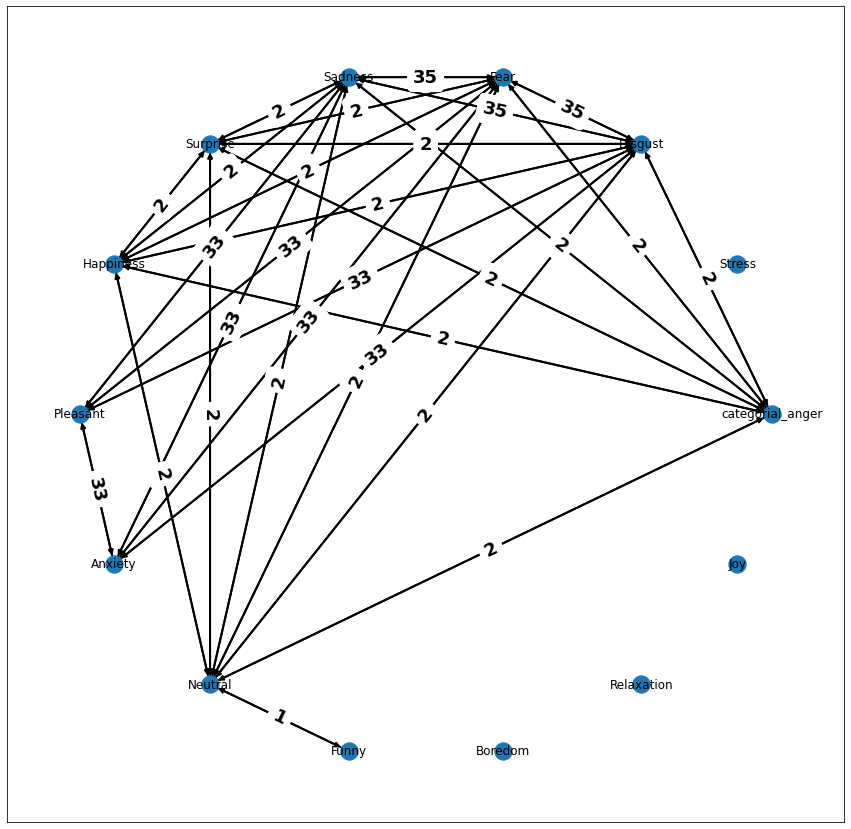

In [12]:

# GRAFO CON DATA REAL A PARTIR DE AQUI
df_self_report=pd.read_csv('..\Emmanuel\data\cleaned\Tabla Normalizada - Self report.csv')
df_self_report=df_self_report.fillna('-')
df_self_report = df_self_report[df_self_report['is_categorial'] == 'x']
df_self_report = df_self_report
df_matrix = df_self_report.iloc[:,18:]
df_matrix = df_matrix[['categorial_anger', 'Stress', 'Disgust', 'Fear', 'Sadness', 'Surprise', 'Happiness','Pleasant', 'Anxiety', 'Neutral', 'Funny', 'Boredom', 'Relaxation', 'Joy']]
#hay que cambiar el nombre de la columna categorial_anger 
df_matrix = df_matrix.replace('-', 0)
df_matrix = df_matrix.replace('x', 1)

adj_matrix = df_matrix.T.dot(df_matrix)

np.fill_diagonal(adj_matrix.values, 0)
G = nx.DiGraph(adj_matrix)

G.number_of_edges()
pos=nx.circular_layout(G)
weights=[wt for u, v, wt in G.edges(data="weight")]
plt.figure(figsize=(15,15))
nx.draw_networkx(G,pos,width=2)
labels=nx.get_edge_attributes(G, "weight") # entiendo que esto te permite poner la cantidad de frecuencia de cada relación con una etiqueta 
#plt.title('Grafo de relaciones entre categorias emocionales')
#plt.figure(figsize=(10,10))
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=18, font_color="black", font_weight="bold")


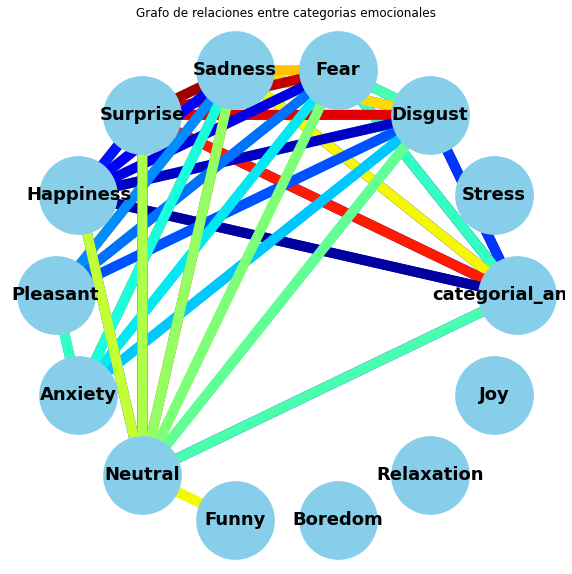

In [14]:
#Distingo las relaciones por colores

G = nx.DiGraph(adj_matrix)
import matplotlib.colors as colors
import matplotlib.cm as cmx
labels=nx.get_edge_attributes(G, "weight")
weights=[wt for u, v, wt in G.edges(data="weight")]
colours = "red"
plt.figure(figsize=(10,10))
plt.title('Grafo de relaciones entre categorias emocionales')
values = range(35)
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
colorList = []

for i in range(35):
    colorVal = scalarMap.to_rgba(values[i])
    colorList.append(colorVal)


g = nx.draw_circular(G, with_labels=True, node_size=1500, node_color="skyblue",edge_color=colorList,edge_cmap=plt.cm.jet,linewidths=40,arrows=True,
                    font_size=18, font_color="black", font_weight="bold", width=10)
#plt.savefig('edges.png')


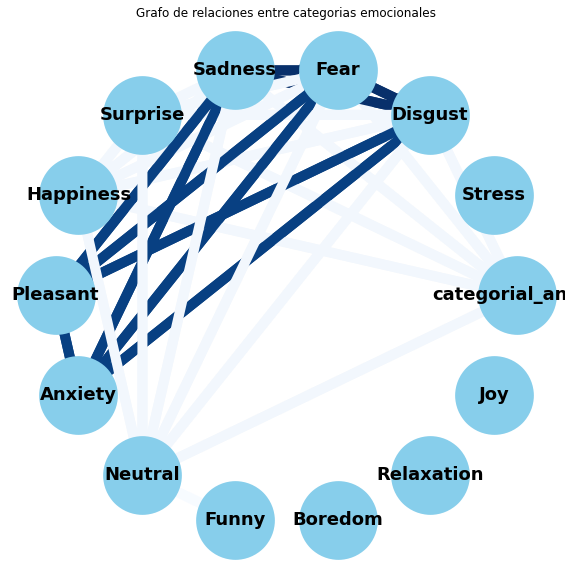

In [17]:
labels=nx.get_edge_attributes(G, "weight")
weights=[wt for u, v, wt in G.edges(data="weight")]
plt.figure(figsize=(10,10))
plt.title('Grafo de relaciones entre categorias emocionales')

g = nx.draw_circular(G, with_labels=True, node_size=1500, node_color="skyblue",edge_color=weights,edge_cmap=plt.cm.Blues,linewidths=40,
                    font_size=18, font_color="black", font_weight="bold", width=10) # el arrow no me funcionó